In [1]:
%matplotlib inline

from dicom_utils import *
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
#import assd_func as af
from skimage import morphology
import matplotlib.patches as mpatches
import assd_func_Sobel_2 as af_Sobel
import time
import random
from scipy.stats import uniform,norm

In [2]:
organ = "prostate" #Change this your organ

In [3]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/1"
output_dir = "Output"
images_1, slices_1, contours_1, labels_1, dummy_mask_1 = main(dicom_dir, output_dir)

In [4]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/3"
output_dir = "Output"
images_3, slices_3, contours_3, labels_3, dummy_mask_3 = main(dicom_dir, output_dir)

In [5]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/4"
output_dir = "Output"
images_4, slices_4, contours_4, labels_4, dummy_mask_4 = main(dicom_dir, output_dir)

   Missing contours for structure: sigmoid


In [6]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/5"
output_dir = "Output"
images_5, slices_5, contours_5, labels_5, dummy_mask_5 = main(dicom_dir, output_dir)

   Missing contours for structure: CTV_
   Missing contours for structure: SeminalVes_Dist
   Missing contours for structure: Hot Spot 7210 cGy (Rectum)
   Missing contours for structure: Hot Spot 7350 cGy (Total PTV)


=> Patient 5 has no prostate (fossa)

In [7]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/6"
output_dir = "Output"
images_6, slices_6, contours_6, labels_6, dummy_mask_6 = main(dicom_dir, output_dir)

In [8]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/7"
output_dir = "Output"
images_7, slices_7, contours_7, labels_7, dummy_mask_7 = main(dicom_dir, output_dir)

In [9]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/8"
output_dir = "Output"
images_8, slices_8, contours_8, labels_8, dummy_mask_8 = main(dicom_dir, output_dir)

In [10]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/9"
output_dir = "Output"
images_9, slices_9, contours_9, labels_9, dummy_mask_9 = main(dicom_dir, output_dir)

In [11]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/10"
output_dir = "Output"
images_10, slices_10, contours_10, labels_10, dummy_mask_10 = main(dicom_dir, output_dir)

   Missing contours for structure: ROI_1


# Rectum

In [12]:
def find_roi_slices(images, labels, i):
    roi_z = []
    for j in range(images.shape[0]):
        if True in np.unique(labels[..., i][j, ...] > 0):
            roi_z.append(j)
    return roi_z

def find_organ_i(organ, contours):
    contour_table = pd.DataFrame()
    number = []
    name = []
    for i in range(len(contours)):
        number.append(contours[i]["number"])
        name.append(contours[i]["name"])
    #contour_table["number"] = number
    contour_table["name"] = name
    contour_table
    organ_i =  contour_table[contour_table["name"].str.contains(organ)].index.tolist()[0]
    return organ_i

In [13]:
organ_i_1 =  find_organ_i(organ, contours_1)
organ_i_1

1

In [14]:
roi_z_1 = find_roi_slices(images_1, labels_1, organ_i_1)

(-0.5, 511.5, 511.5, -0.5)

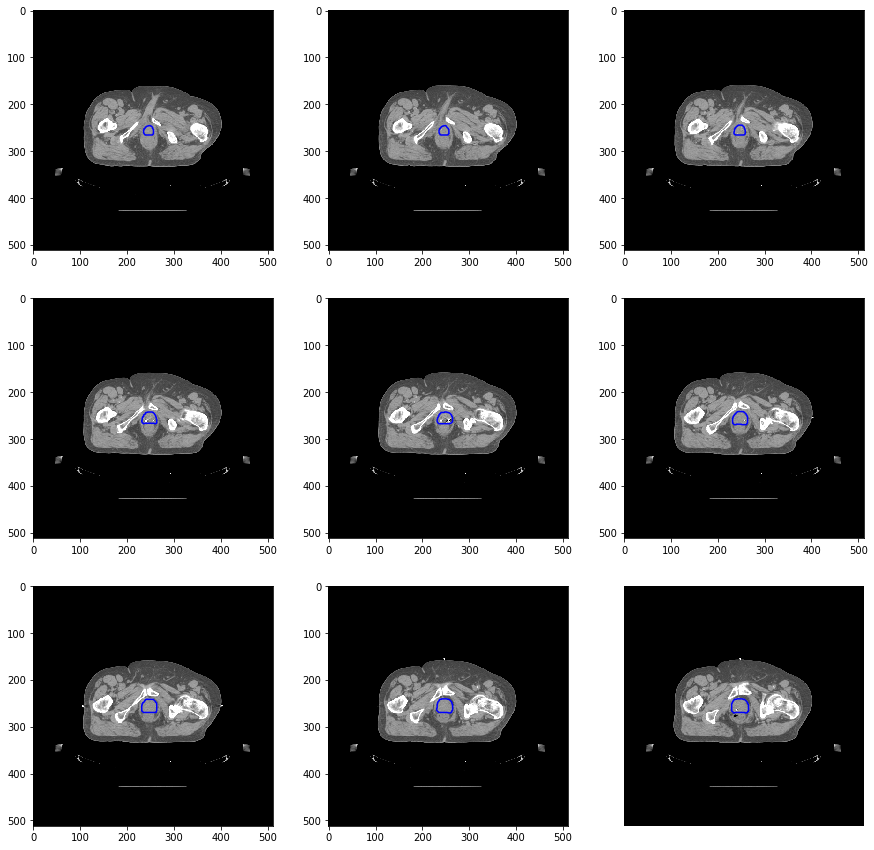

In [15]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_1[i + roi_z_1[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_1[..., organ_i_1][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_2[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_2[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [16]:
organ_i_3 =  find_organ_i(organ, contours_3)
organ_i_3

6

In [17]:
roi_z_3 = find_roi_slices(images_3, labels_3, organ_i_3)

(-0.5, 511.5, 511.5, -0.5)

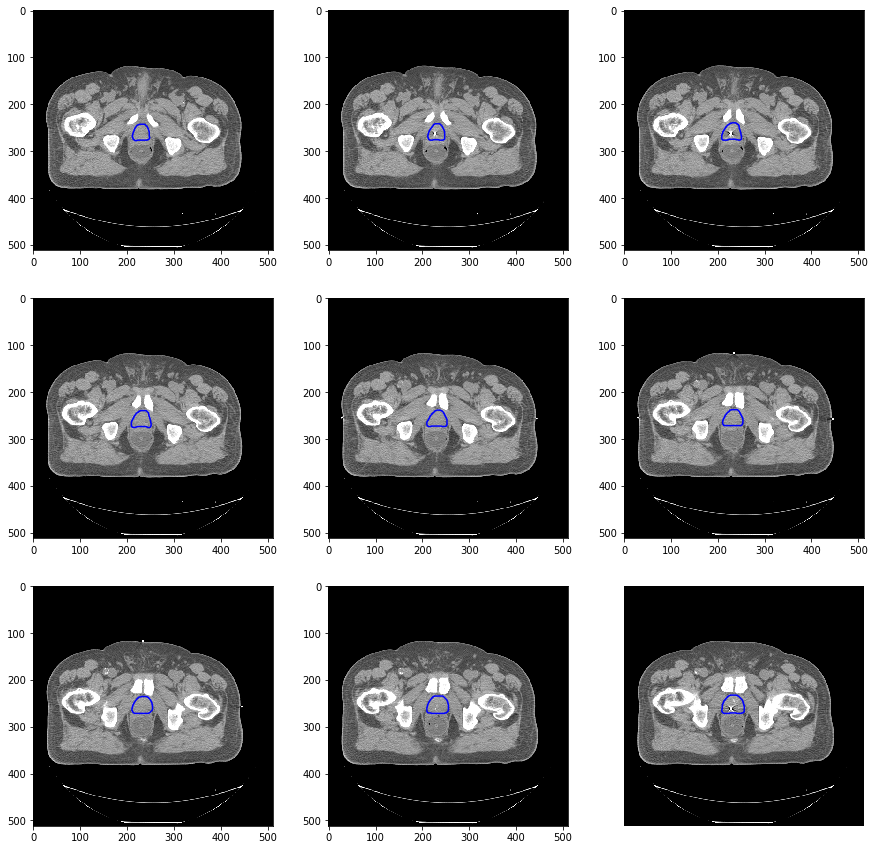

In [18]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_3[i + roi_z_3[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_3[..., organ_i_3][i + roi_z_3[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [19]:
organ_i_4 =  find_organ_i(organ, contours_4)
organ_i_4

3

In [20]:
roi_z_4 = find_roi_slices(images_4, labels_4, organ_i_4)

(-0.5, 511.5, 511.5, -0.5)

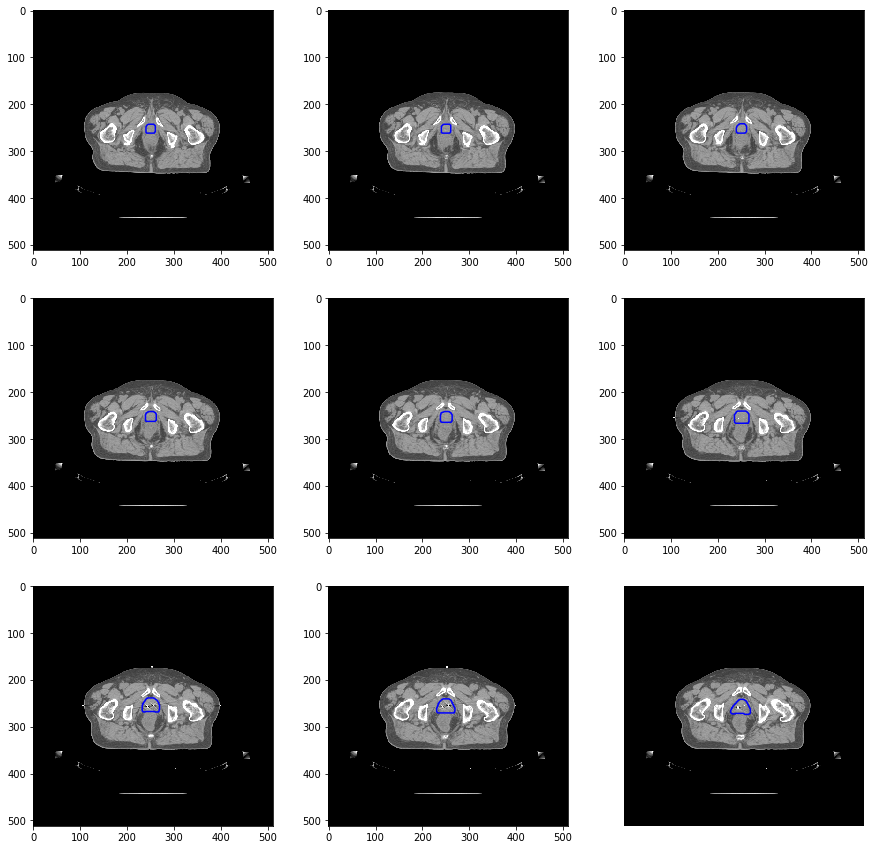

In [21]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_4[i + roi_z_4[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_4[..., organ_i_4][i + roi_z_4[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [22]:
organ_i_6 =  find_organ_i(organ, contours_6)
organ_i_6

1

In [23]:
roi_z_6 = find_roi_slices(images_6, labels_6, organ_i_6)

(-0.5, 511.5, 511.5, -0.5)

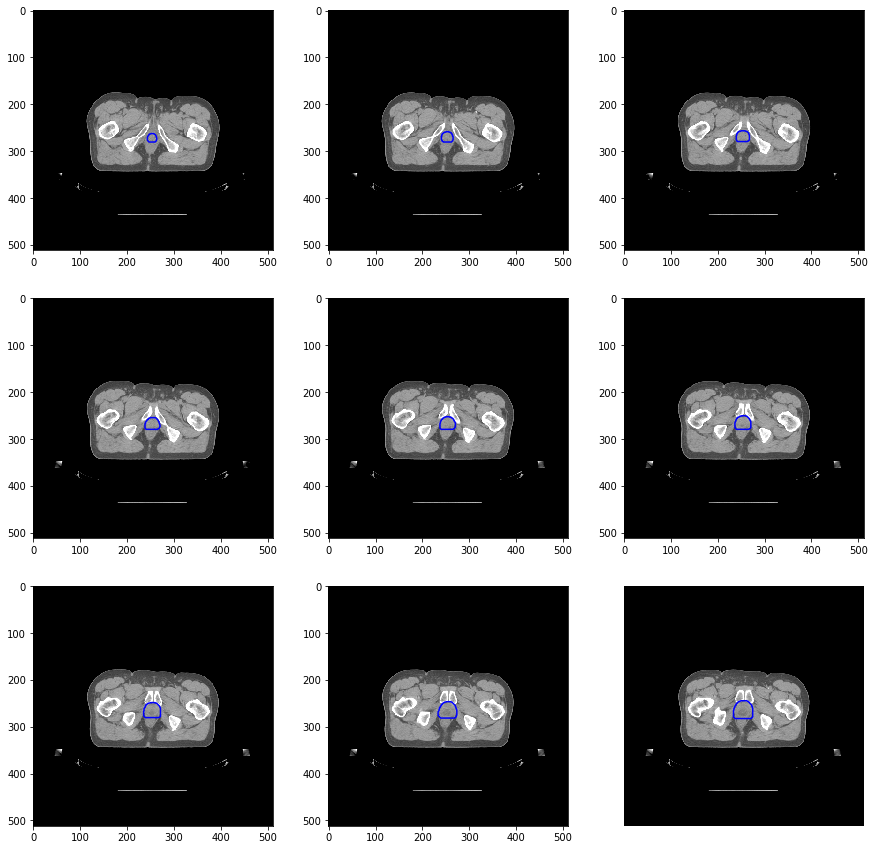

In [24]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_6[i + roi_z_6[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_6[..., organ_i_6][i + roi_z_6[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [25]:
organ_i_7 =  find_organ_i(organ, contours_7)
organ_i_7

1

In [26]:
roi_z_7 = find_roi_slices(images_7, labels_7, organ_i_7)

(-0.5, 511.5, 511.5, -0.5)

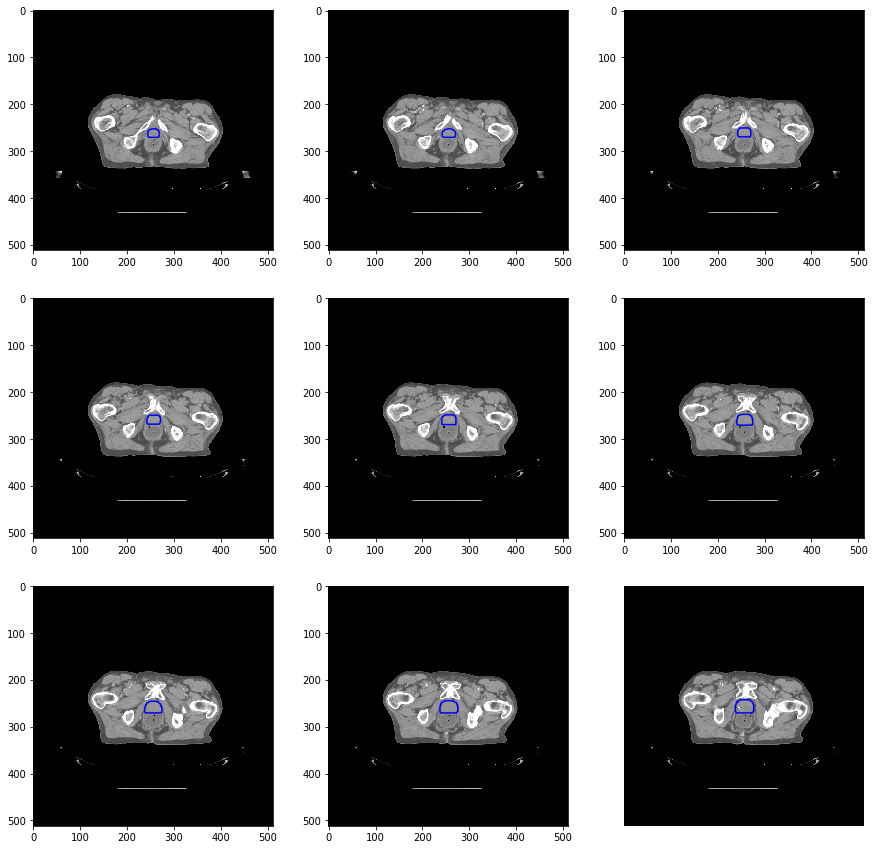

In [27]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_7[i + roi_z_7[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_7[..., organ_i_7][i + roi_z_7[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [28]:
organ_i_8 =  find_organ_i(organ, contours_8)
organ_i_8

3

In [29]:
roi_z_8 = find_roi_slices(images_8, labels_8, organ_i_8)

(-0.5, 511.5, 511.5, -0.5)

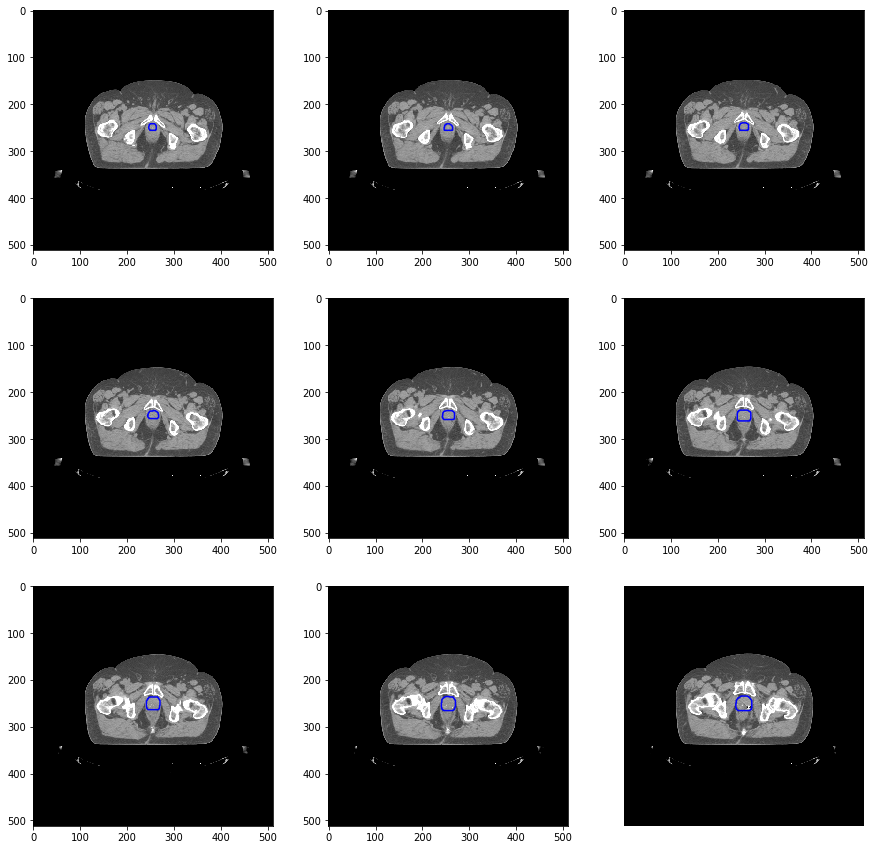

In [30]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_8[i + roi_z_8[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_8[..., organ_i_8][i + roi_z_8[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [31]:
organ_i_9 =  find_organ_i(organ, contours_9)
organ_i_9

3

In [32]:
roi_z_9 = find_roi_slices(images_9, labels_9, organ_i_9)

(-0.5, 511.5, 511.5, -0.5)

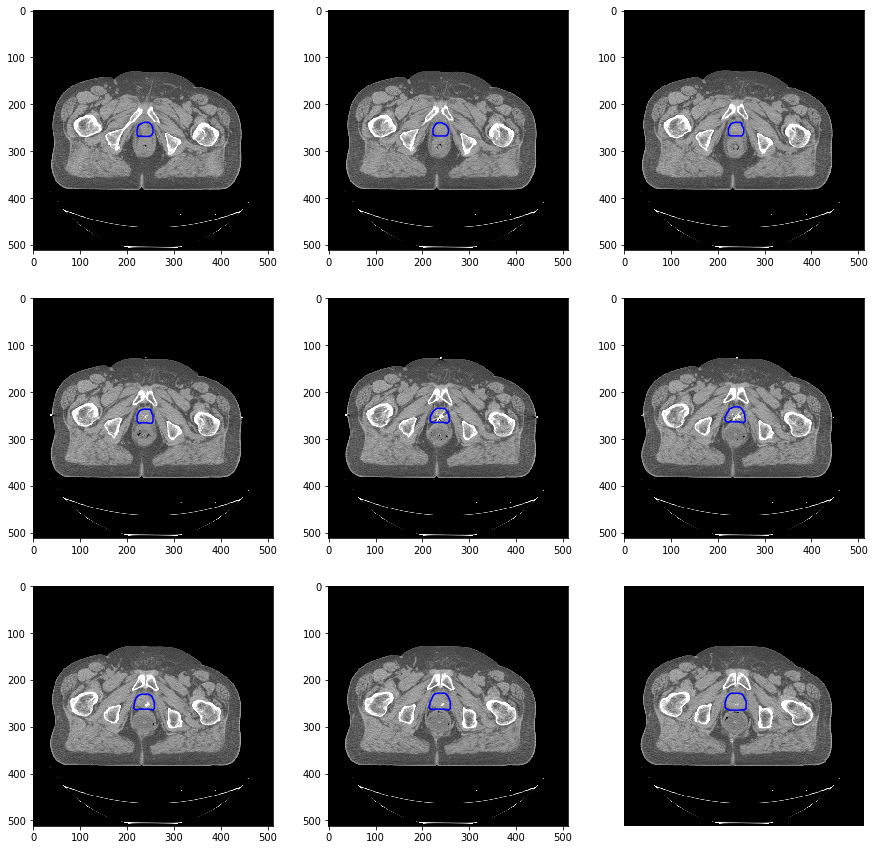

In [33]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_9[i + roi_z_9[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_9[..., organ_i_9][i + roi_z_9[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [34]:
organ_i_10 =  find_organ_i(organ, contours_10)
organ_i_10

1

In [35]:
roi_z_10 = find_roi_slices(images_10, labels_10, organ_i_10)

(-0.5, 511.5, 511.5, -0.5)

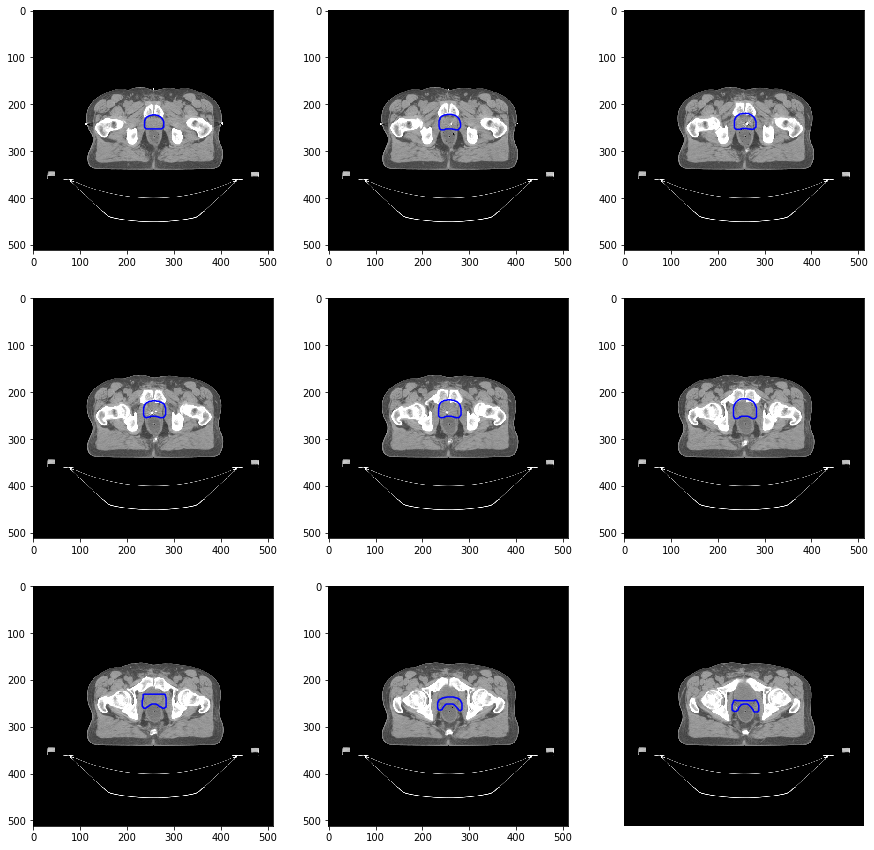

In [36]:
organ_i = 4
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_10[i + roi_z_10[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_10[..., organ_i_10][i + roi_z_10[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

## Different Slices

c = 20
k = 15
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_rectum_num = labels_num[..., organ_i_num].copy()
seed = 123

for i in roi_z_num:
    dx, dy, masknum, t, L, roi_z_num = af_Sobel.assd_Sobel(images_num[i, ...], labels_num[..., organ_i_num][i, ...], voxelsize, a, SD, circles, seed, k, w, images_num, labels_num, organ_i_num, ismax=ismax, smooth=True)
    dunum = af_Sobel.plotting_assd(dx, dy, masknum, images_num[i, ...], quiver=False, plot=False) 
    assd_contour_rectum_num[i, ...] = dunum  
assd_contour_rectum_num = np.array(assd_contour_rectum_num)

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images_num[roi_z_num[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_rectum_num[roi_z_num[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_num[..., roi_i_num][roi_z_num[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(270, 220)
    plt.ylim(300, 260)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

(200.0, 300.0, 300.0, 200.0)

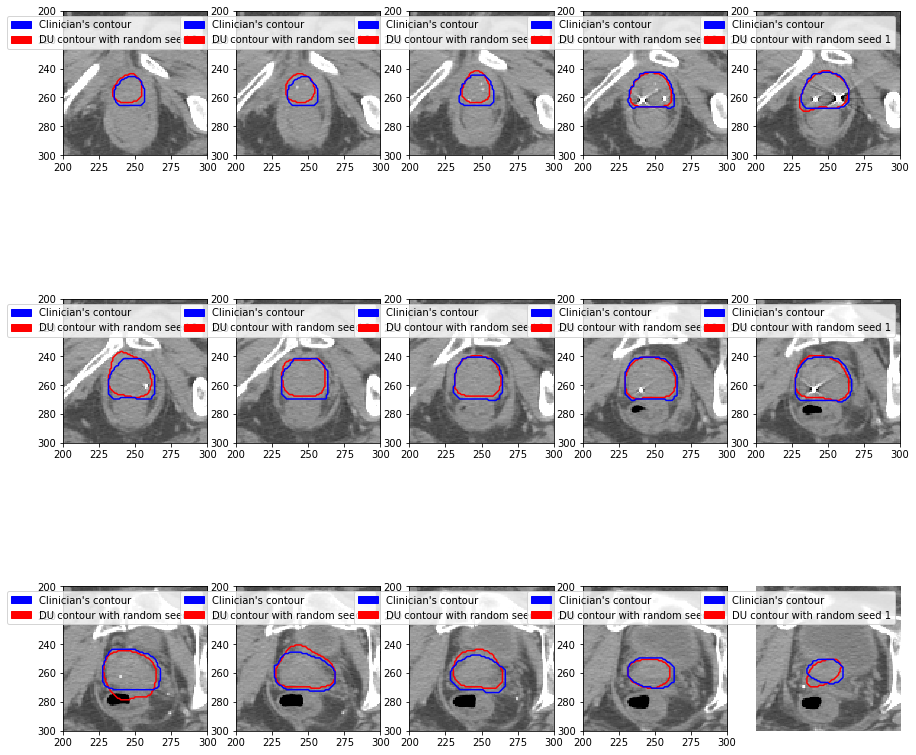

In [37]:
c = 35
k = 15
w = 2
circles = 3
ismax=True
a = 50
SD=[c*1.3, c*1.3, c*3]
voxelsize = np.array([0.1076562, 0.1076562, 2.5])

assd_contour_prostate_1 = labels_1[..., organ_i_1].copy()
seed = 72

for i in roi_z_1:
    dx, dy, mask1, t, L, roi_z_1 = af_Sobel.assd_Sobel(images_1[i, ...], labels_1[..., organ_i_1][i, ...], voxelsize, a, SD, circles, seed, k, w, images_1, labels_1, organ_i_1, ismax=ismax, smooth=True)
    du1 = af_Sobel.plotting_assd(dx, dy, mask1, images_1[i, ...], quiver=False, plot=False) 
    assd_contour_prostate_1[i, ...] = du1  
assd_contour_prostate_1 = np.array(assd_contour_prostate_1)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_1[roi_z_1[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_prostate_1[roi_z_1[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_1[..., organ_i_1][roi_z_1[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [38]:
destination_path = "Output"
RTStruct([labels_1[..., organ_i_1], assd_contour_prostate_1], ["truth prostate contour", "auto prostate contour"], slices_1, fname=os.path.join(destination_path, 'prostate_contour_subject_1.dcm'))

Writing the RT Structure file...
Setting file meta information...
Setting dataset values...
index :  2
[-325.000, -325.000, -172.000]
LENGTH DICOM IMAGE STRUCT :  186
Mask Name :  truth prostate contour -----------------------------
Mask Name :  auto prostate contour -----------------------------
Writing test file
Output/prostate_contour_subject_1.dcm
File saved.


(300.0, 180.0, 180.0, 300.0)

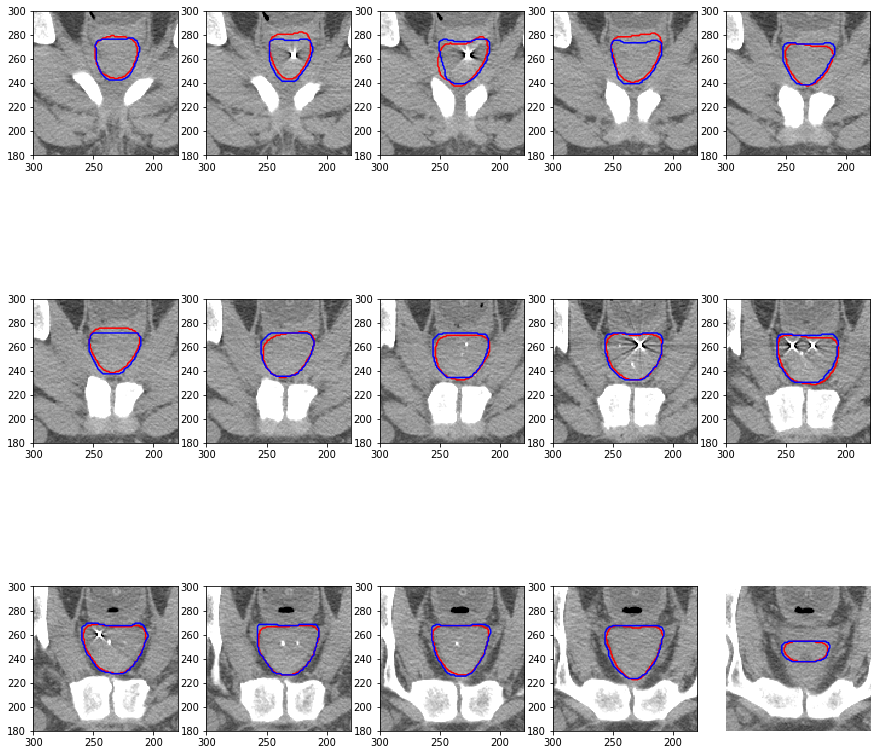

In [39]:
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_prostate_3 = labels_3[..., organ_i_3].copy()


for i in roi_z_3:
    dx, dy, mask3, t, L, roi_z_3 = af_Sobel.assd_Sobel(images_3[i, ...], labels_3[..., organ_i_3][i, ...], voxelsize, a, SD, circles, seed, k, w, images_3, labels_3, organ_i_3, ismax=ismax, smooth=True)
    du3 = af_Sobel.plotting_assd(dx, dy, mask3, images_3[i, ...], quiver=False, plot=False) 
    assd_contour_prostate_3[i, ...] = du3  
assd_contour_prostate_3 = np.array(assd_contour_prostate_3)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_3[roi_z_3[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_prostate_3[roi_z_3[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_3[..., organ_i_3][roi_z_3[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(300, 180)
    plt.ylim(180, 300)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [40]:
RTStruct([labels_3[..., organ_i_3], assd_contour_prostate_3], ["truth prostate contour", "auto prostate contour"], slices_3, fname=os.path.join(destination_path, 'prostate_contour_subject_3.dcm'))

Writing the RT Structure file...
Setting file meta information...
Setting dataset values...
index :  2
[-250.000, -250.000, -200.250]
LENGTH DICOM IMAGE STRUCT :  190
Mask Name :  truth prostate contour -----------------------------
Mask Name :  auto prostate contour -----------------------------
Writing test file
Output/prostate_contour_subject_3.dcm
File saved.


(300.0, 210.0, 210.0, 300.0)

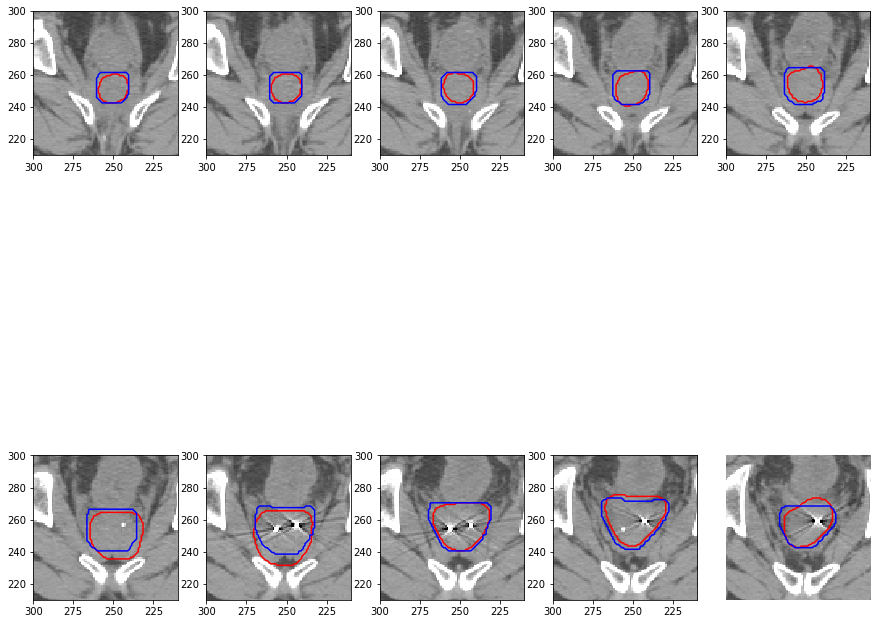

In [41]:
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_prostate_4 = labels_4[..., organ_i_4].copy()

for i in roi_z_4:
    dx, dy, mask4, t, L, roi_z_4 = af_Sobel.assd_Sobel(images_4[i, ...], labels_4[..., organ_i_4][i, ...], voxelsize, a, SD, circles, seed, k, w, images_4, labels_4, organ_i_4, ismax=ismax, smooth=True)
    du4 = af_Sobel.plotting_assd(dx, dy, mask4, images_4[i, ...], quiver=False, plot=False) 
    assd_contour_prostate_4[i, ...] = du4  
assd_contour_prostate_4 = np.array(assd_contour_prostate_4)

plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_4[roi_z_4[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_prostate_4[roi_z_4[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_4[..., organ_i_4][roi_z_4[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(300, 210)
    plt.ylim(210, 300)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [42]:
RTStruct([labels_4[..., organ_i_4], assd_contour_prostate_4], ["truth prostate contour", "auto prostate contour"], slices_4, fname=os.path.join(destination_path, 'prostate_contour_subject_4.dcm'))

Writing the RT Structure file...
Setting file meta information...
Setting dataset values...
index :  2
[-325.000, -325.000, -97.250]
LENGTH DICOM IMAGE STRUCT :  113
Mask Name :  truth prostate contour -----------------------------
Mask Name :  auto prostate contour -----------------------------
Writing test file
Output/prostate_contour_subject_4.dcm
File saved.


In [ ]:
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_prostate_6 = labels_6[..., organ_i_6].copy()

for i in roi_z_6:
    dx, dy, mask6, t, L, roi_z_6 = af_Sobel.assd_Sobel(images_6[i, ...], labels_6[..., organ_i_6][i, ...], voxelsize, a, SD, circles, seed, k, w, images_6, labels_6, organ_i_6, ismax=ismax, smooth=True)
    du6 = af_Sobel.plotting_assd(dx, dy, mask6, images_6[i, ...], quiver=False, plot=False) 
    assd_contour_prostate_6[i, ...] = du6  
assd_contour_prostate_6 = np.array(assd_contour_prostate_6)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_6[roi_z_6[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_prostate_6[roi_z_6[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_6[..., organ_i_6][roi_z_6[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
RTStruct([labels_6[..., organ_i_6], assd_contour_prostate_6], ["truth prostate contour", "auto prostate contour"], slices_6, fname=os.path.join(destination_path, 'prostate_contour_subject_6.dcm'))

In [ ]:
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_prostate_7 = labels_7[..., organ_i_7].copy()

for i in roi_z_7:
    dx, dy, mask7, t, L, roi_z_7 = af_Sobel.assd_Sobel(images_7[i, ...], labels_7[..., organ_i_7][i, ...], voxelsize, a, SD, circles, seed, k, w, images_7, labels_7, organ_i_7, ismax=ismax, smooth=True)
    du7 = af_Sobel.plotting_assd(dx, dy, mask7, images_7[i, ...], quiver=False, plot=False) 
    assd_contour_prostate_7[i, ...] = du7  
assd_contour_prostate_7 = np.array(assd_contour_prostate_7)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_7[roi_z_7[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_prostate_7[roi_z_7[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_7[..., organ_i_7][roi_z_7[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
RTStruct([labels_7[..., organ_i_7], assd_contour_prostate_7], ["truth prostate contour", "auto prostate contour"], slices_7, fname=os.path.join(destination_path, 'prostate_contour_subject_7.dcm'))

In [ ]:
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_prostate_8 = labels_8[..., organ_i_8].copy()

for i in roi_z_8:
    dx, dy, mask8, t, L, roi_z_8 = af_Sobel.assd_Sobel(images_8[i, ...], labels_8[..., organ_i_8][i, ...], voxelsize, a, SD, circles, seed, k, w, images_8, labels_8, organ_i_8, ismax=ismax, smooth=True)
    du8 = af_Sobel.plotting_assd(dx, dy, mask8, images_8[i, ...], quiver=False, plot=False) 
    assd_contour_prostate_8[i, ...] = du8  
assd_contour_prostate_8 = np.array(assd_contour_prostate_8)

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images_8[roi_z_8[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_prostate_8[roi_z_8[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_8[..., organ_i_8][roi_z_8[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
RTStruct([labels_8[..., organ_i_8], assd_contour_prostate_8], ["truth prostate contour", "auto prostate contour"], slices_8, fname=os.path.join(destination_path, 'prostate_contour_subject_8.dcm'))

In [ ]:
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_prostate_9 = labels_9[..., organ_i_9].copy()

for i in roi_z_9:
    dx, dy, mask9, t, L, roi_z_9 = af_Sobel.assd_Sobel(images_9[i, ...], labels_9[..., organ_i_9][i, ...], voxelsize, a, SD, circles, seed, k, w, images_9, labels_9, organ_i_9, ismax=ismax, smooth=True)
    du9 = af_Sobel.plotting_assd(dx, dy, mask9, images_9[i, ...], quiver=False, plot=False) 
    assd_contour_prostate_9[i, ...] = du9  
assd_contour_prostate_9 = np.array(assd_contour_prostate_9)

plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_9[roi_z_9[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_prostate_9[roi_z_9[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_9[..., organ_i_9][roi_z_9[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
RTStruct([labels_9[..., organ_i_9], assd_contour_prostate_9], ["truth prostate contour", "auto prostate contour"], slices_9, fname=os.path.join(destination_path, 'prostate_contour_subject_9.dcm'))

In [ ]:
w = 2
SD=[c*1.3, c*1.3, c*3]
assd_contour_prostate_10 = labels_10[..., organ_i_10].copy()

for i in roi_z_10:
    dx, dy, mask10, t, L, roi_z_10 = af_Sobel.assd_Sobel(images_10[i, ...], labels_10[..., organ_i_10][i, ...], voxelsize, a, SD, circles, seed, k, w, images_10, labels_10, organ_i_10, ismax=ismax, smooth=True)
    du10 = af_Sobel.plotting_assd(dx, dy, mask10, images_10[i, ...], quiver=False, plot=False) 
    assd_contour_prostate_10[i, ...] = du10  
assd_contour_prostate_10 = np.array(assd_contour_prostate_10)

plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_10[roi_z_10[i] , ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(assd_contour_prostate_10[roi_z_10[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.contour(labels_10[..., organ_i_10][roi_z_10[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    #blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
    #red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
    #plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

In [ ]:
RTStruct([labels_10[..., organ_i_10], assd_contour_prostate_10], ["truth prostate contour", "auto prostate contour"], slices_10, fname=os.path.join(destination_path, 'prostate_contour_subject_10.dcm'))

In [ ]:
import pydicom
dir_1 = "/home/vily/MRI-Project/contour_segmentation/Output/Prostate-seed72/"
ds = dicom.read_file(dir_1 + "prostate_contour_subject_10.dcm", force=True)
ds.dir("contour")

In [ ]:
ctrs = ds.ROIContourSequence

In [ ]:
ctrs[0].ContourSequence[0].ContourData